In [1]:
from os import listdir
from os.path import isfile, join
import re
demographic_files = [f for f in listdir('BabyNames/') if isfile(join('BabyNames/', f)) and re.search('^yob\d', f)]
demographic_files.sort()

In [2]:
import pandas as pd
def read_file(file_name):
    year = re.search('yob(\d+).txt', file_name).group(1)
    df = pd.read_csv('BabyNames/{0}'.format(file_name), sep=',', header=None)
    df.columns = ['Name', 'Sex', 'Count']
    df['Year'] = year
    return df

read_data_frames = [read_file(f_name) for f_name in demographic_files]

# Выполнение пункта 1 задания "Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов"

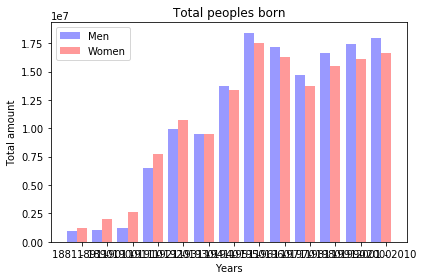

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

start_index = 1
end_index = 130
interval = 10

n_groups = len(read_data_frames[start_index:end_index]) / interval

years = []
mens_amount = []
womens_amount = []

def year_interval_name(frames, start_index, end_index):
    start_year = frames[start_index].loc[0]['Year']
    end_year = frames[end_index].loc[0]['Year']
    return '{0} - {1}'.format(start_year, end_year)

for index in range(start_index, end_index, interval):
    start_frame_index = index
    end_frame_index = index + interval - 1
    interval_mens_amount = 0
    interval_womens_amount = 0
    for frame in read_data_frames[start_frame_index:end_frame_index]:
        interval_mens_amount += frame.loc[frame['Sex'] == 'M', ['Count']].sum()['Count']
        interval_womens_amount += frame.loc[frame['Sex'] == 'F', ['Count']].sum()['Count']

    years += [year_interval_name(read_data_frames, start_frame_index, end_frame_index)]
    mens_amount += [interval_mens_amount]
    womens_amount += [interval_womens_amount]

years_values = tuple(years)
womens_values = tuple(womens_amount)
mens_values = tuple(mens_amount)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.4

opacity = 0.4

rects1 = ax.bar(index, mens_values, bar_width,
                alpha=opacity, color='b',
                label='Men')

rects2 = ax.bar(index + bar_width, womens_values, bar_width,
                alpha=opacity, color='r',
                label='Women')

ax.set_xlabel('Years')
ax.set_ylabel('Total amount')
ax.set_title('Total peoples born')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(years_values)
ax.legend()

fig.tight_layout()
plt.rcParams["figure.figsize"] = [30, 4.8]
plt.show()



# Выполнение пункта 2 задания "Найдите самые популярные имена за всю историю"

Количество людей по годам сильно меняется. Следовательно нельзя просто сложить количества людей и получить ответ.
Кроме этого очевидно что надо брать те, что на вершине списка т.к. в дата фрейме данные уже отсортированы по частоте.
Предположительно необхоимо найти N (у нас N будет 500) наиболее часто встречающихся, в процентном соотношении для совего года. Посчитать статистику по всем годам. И вот тут уже сложить все проценты и отсортировать по суммарному значению.

In [72]:
def count_percentage_for_set(data_frame, gender, limit=500):
    filtered_by_gender = data_frame.loc[data_frame['Sex'] == gender]
    probe = filtered_by_gender[0:limit]
    total_count = filtered_by_gender.get(['Count']).sum()['Count']
    probe['Relative frequency'] = probe['Count'].map(lambda count: count / total_count)
    result = probe.get(['Name', 'Relative frequency'])
    return result

def get_most_frequent(percentages_list, limit=150):
    total_data_frame = pd.concat(percentages_list).groupby(['Name']).sum()
    result = total_data_frame.sort_values(by='Relative frequency', ascending=False)[0:limit]
    return result

male_percentages = []
for frame in read_data_frames:
    male_percentages += [count_percentage_for_set(frame, 'M')]

female_percentages = []
for frame in read_data_frames:
    female_percentages += [count_percentage_for_set(frame, 'F')]

males_chart = get_most_frequent(male_percentages)
females_chart = get_most_frequent(female_percentages)

print(males_chart)
print(females_chart)
# p1 = pd.concat(male_percentages)
# result = p1.groupby(['Name']).sum()
# result = result.sort_values(by='Relative frequency', ascending=False)[0:150]
# print(result)



/home/carefreeslacker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


NameError: name 'get_most_frequest' is not defined

In [71]:
def get_most_frequent(percentages_list, limit=150):
    total_data_frame = pd.concat(percentages_list).groupby(['Name']).sum()
    result = total_data_frame.sort_values(by='Relative frequency', ascending=False)[0:limit]
    return result

get_most_frequent(male_percentages)
# pd.concat(male_percentages).groupby(['Name']).sum()

,Relative frequency
Name,
John,5.568648
James,4.787865
William,4.649001
Robert,3.972054
Charles,2.646608
Michael,2.463073
Joseph,2.417458
David,2.244728
George,2.214910


In [63]:
result = p1.groupby(['Name']).sum()
result = result.sort_values(by='Relative frequency', ascending=False)[0:150]
print(result)

             Relative frequency
Name                           
John                   5.568648
James                  4.787865
William                4.649001
Robert                 3.972054
Charles                2.646608
Michael                2.463073
Joseph                 2.417458
David                  2.244728
George                 2.214910
Thomas                 1.990078
Richard                1.891915
Edward                 1.500848
Frank                  1.416136
Daniel                 1.160783
Paul                   1.116538
Christopher            1.083129
Donald                 1.065626
Henry                  1.021702
Walter                 0.956570
Anthony                0.864396
Kenneth                0.862380
Matthew                0.848460
Harry                  0.841239
Andrew                 0.838819
Arthur                 0.796311
Raymond                0.742051
Albert                 0.736128
Mark                   0.733495
Steven                 0.682491
Ronald  